# Forecasting Sales of the online store.

You have a Dataset that contains data on video game sales worldwide. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

## Stage 1. Data Overview <a id='data_review'></a>

1. Use the necessary libraries. 
2. Open and read the file. 
3. View basic information and statistics on the dataset
4. Conclusion

### 1.1 Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import seaborn as sns
from scipy import stats as st
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import warnings

### 1.2 Open the data file and have a look at the general information.

In [2]:
# to try to open a data file
try:
    games_data = pd.read_csv('https://raw.githubusercontent.com/yorko/mlcourse.ai/master/data/video_games_sales.csv')
except:
    print('Unable to open the file')

### 1.3 Description of the dataset

In [3]:
# description of the table data
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
# to look at the main statistics of data frame
games_data.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


### 1.4 Conclusion

The dataset contains 16,719 rows and 16 columns. The data set has missing values, some values need to be corrected.

## Stage 2. Data Preprocessing <a id='data_preprocessing'></a>
1. Replace the column names.
2. Check for duplicates
3. Work with missing values. Their counting, replacement, removal.
4. Convert the data to the required types.
5. Enrich the data. Adding general sales, classifying individual features.
6. Conclusion

In [5]:
# the first 10 rows of the table
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1 Header style <a id='header_style'></a>

In [6]:
# the list of column names in the data set table
games_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
# renaming columns
games_data = games_data.rename(columns = {'Name':'name','Platform':'platform','Year_of_Release':'year_of_release',
                                          'Genre':'genre','NA_Sales':'na_sales','EU_Sales':'eu_sales','JP_Sales':'jp_sales',
                                          'Other_Sales':'other_sales','Global_Sales':'global_sales','Critic_Count':'critic_count',
                                          'User_Count':'user_count','Critic_Score':'critic_score','User_Score':'user_score',
                                          'Developer':'developer','Publisher':'publisher','Rating':'rating'})
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

### 2.2 Duplicates <a id='duplicates'></a>

In [8]:
# count the number of duplicates
print('Number of duplicates:',games_data.duplicated().sum())

Number of duplicates: 0


### 2.3 Processing missing values

In [9]:
# calculating missing values
games_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         6704
user_count         9129
developer          6623
rating             6769
dtype: int64

In [10]:
# calculate the percentage of missing values
games_data.isna().sum()*100/len(games_data)

name                0.011962
platform            0.000000
year_of_release     1.608948
genre               0.011962
publisher           0.322986
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
global_sales        0.000000
critic_score       51.330821
critic_count       51.330821
user_score         40.098092
user_count         54.602548
developer          39.613613
rating             40.486871
dtype: float64

In [11]:
# delete missing values in the column 'genre', 'name' and 'year_of_release'
games_data = games_data.dropna(subset = ['year_of_release'])
games_data = games_data.dropna(subset = ['genre'])
games_data = games_data.dropna(subset = ['name'])
games_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher            32
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8465
critic_count       8465
user_score         6608
user_count         8985
developer          6541
rating             6679
dtype: int64

In [12]:
# unique values in "critic_score" and "user_score" columns
print(games_data['critic_score'].unique())
print(games_data['user_score'].unique())

# replace the value "tbd" NaN
games_data = games_data.replace('tbd', np.nan)

# replace with the nearest known value from abo
games_data['critic_score'] = games_data['critic_score'].fillna(method = 'ffill')
games_data['user_score'] = games_data['user_score'].fillna(method = 'ffill')

# check missing values in the dataframe
print(games_data.isna().sum())

# check the dataframe
games_data.sample(10)

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
name                  0
platform              0
year_of_release       0
genre                 0
p

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
7233,Aliens vs Predator: Requiem,PSP,2007.0,Action,Vivendi Games,0.03,0.12,0.00,0.07,0.22,49.0,34.0,5.6,19.0,Rebellion,T
4816,Rocket Power: Dream Scheme,GBA,2001.0,Action,THQ,0.29,0.11,0.00,0.01,0.40,77.0,NaN,8.1,NaN,NaN,NaN
2042,Naruto: Clash of Ninja Revolution,Wii,2007.0,Fighting,Tomy Corporation,0.44,0.46,0.00,0.11,1.01,74.0,23.0,8,27.0,8ing/Raizing,T
4218,SimCity Creator,Wii,2008.0,Simulation,Electronic Arts,0.36,0.02,0.04,0.04,0.46,67.0,17.0,6.8,13.0,Electronic Arts,E
11412,Build 'n Race,Wii,2009.0,Racing,Zoo Games,0.08,0.00,0.00,0.01,0.08,71.0,NaN,7.8,NaN,Icon Games,E
10716,Dora & Kai-Lan's Pet Shelter,DS,2011.0,Strategy,Take-Two Interactive,0.08,0.01,0.00,0.01,0.10,67.0,NaN,5.2,NaN,NaN,NaN
4626,Kumamon Bomber: Puzzle de Kumamon Taisou,GC,2005.0,Puzzle,Sega,0.32,0.08,0.00,0.01,0.42,75.0,NaN,8.5,NaN,NaN,NaN
1376,LEGO Star Wars II: The Original Trilogy,PSP,2006.0,Action,LucasArts,0.58,0.50,0.00,0.32,1.40,83.0,11.0,8.6,26.0,Traveller's Tales,E10+
14314,Super Hero Generation,PS3,2014.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03,70.0,NaN,6.4,NaN,NaN,NaN
7144,Whirl Tour,PS2,2002.0,Sports,Crave Entertainment,0.11,0.09,0.00,0.03,0.22,58.0,9.0,7,5.0,Papaya Studios,E


### 2.4 Data type replacement

In [13]:
# make the values in the "year_of_release" column an integer data type
games_data['year_of_release'] = games_data['year_of_release'].astype('int')
games_data['user_score'] = games_data['user_score'].astype('float')

# check the dataframe
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16448 non-null  object 
 1   platform         16448 non-null  object 
 2   year_of_release  16448 non-null  int32  
 3   genre            16448 non-null  object 
 4   publisher        16416 non-null  object 
 5   na_sales         16448 non-null  float64
 6   eu_sales         16448 non-null  float64
 7   jp_sales         16448 non-null  float64
 8   other_sales      16448 non-null  float64
 9   global_sales     16448 non-null  float64
 10  critic_score     16448 non-null  float64
 11  critic_count     7983 non-null   float64
 12  user_score       16448 non-null  float64
 13  user_count       7463 non-null   float64
 14  developer        9907 non-null   object 
 15  rating           9769 non-null   object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.1+ MB


### 2.5 Enrich Data

In [14]:
# Calculate the total sales (the sum of sales in all regions).
games_data['total'] = games_data['global_sales']
games_data.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,76.0,NaN,8.0,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,80.0,NaN,8.0,NaN,NaN,NaN,31.37


In [15]:
# delete the columns that we won't use
games_data = games_data.drop(['publisher','global_sales','critic_count','user_count','developer'],axis = 1)
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.53
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,76.0,8.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,80.0,8.0,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,63.0,5.8,NaN,0.01
16715,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
16716,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,63.0,5.8,NaN,0.01
16717,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,63.0,5.8,NaN,0.01


In [16]:
# unique values in the "rating" column
games_data['rating'] = games_data['rating'].fillna('undefined')
print(games_data['rating'].unique())


['E' 'undefined' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


### 2.6 Conclusion

Column names have been transformed into a convenient form for further work. All values after replacement contain only lowercase characters. Missing values in columns containing less than 10% are removed. The value "tbd" (to be determined) was replaced with the value NaN. In columns where the missing values are greater than 10%, they are replaced by the nearest known values from above. The "float" data type in the "year_of_release" column has been replaced with integer, because the year value is not repeated and it makes no sense to enter the datetime data type. The data type in the "user_score" column has been replaced by the float data type to make it more comfortable to read it further. The "total" column has also been created, in which the total profit for all regions is calculated. In the "rating" column, the missing values are replaced with "undefined".

## Stage 3. Analyze the Data  <a id='data_preprocessing'></a>
1. The number of games released in different years. 
2. Changes in sales from year to year. 
3. Platforms with the highest total sales. 
4. Platforms with sales over the past few years. 
5. Platform lifetime. 
6. Relevant data. 
7. Sales leaders. 
8. Potentially profitable platforms. 
9. Average sales by platform. 
10. The impact of reviews on sales. 
11. Compare the sales of games on one platform with other platforms. 
12. The most profitable genres. 
13. Conclusion.

### 3.1 Aggregate data for different years

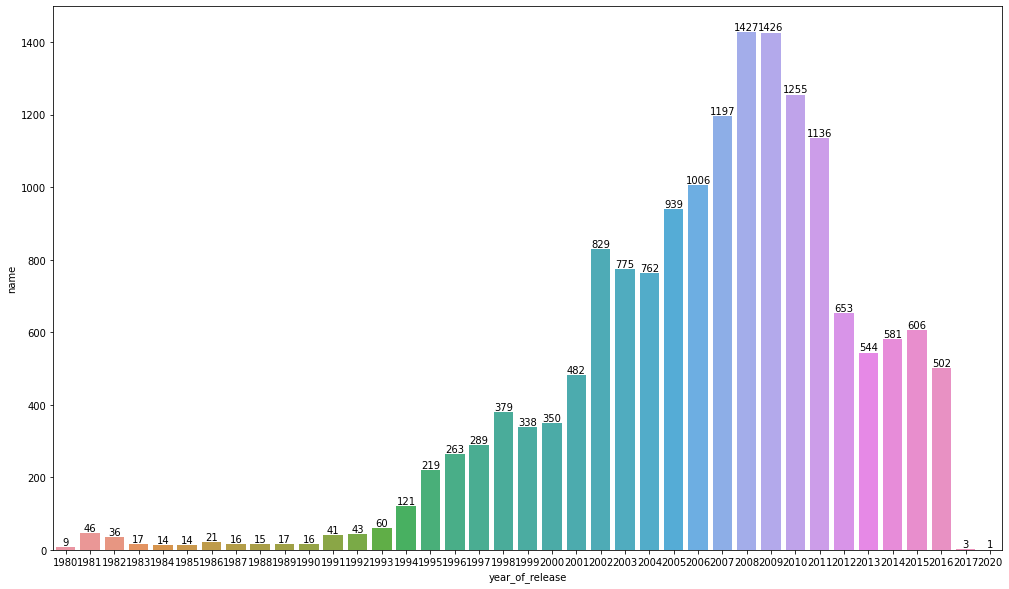

In [17]:
# histogram of the distribution of games by year
years = games_data.groupby('year_of_release')['name'].count().reset_index()
fig = plt.figure(figsize = (17, 10))
ax = plt.subplot(111)
bars = sns.barplot(x='year_of_release', y='name', data=years)
ax.bar_label(bars.containers[0])
plt.show()

### 3.2 Significant sales by year

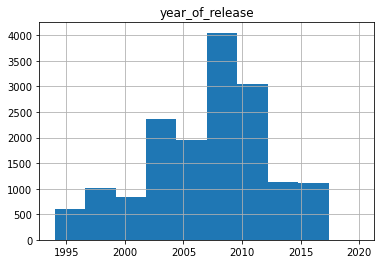

In [18]:
# the largest sales by year
significant_data_years = games_data.query('year_of_release > 1993')
significant_data_years.hist('year_of_release')
plt.show()

### 3.3 Aggregate data for different platform

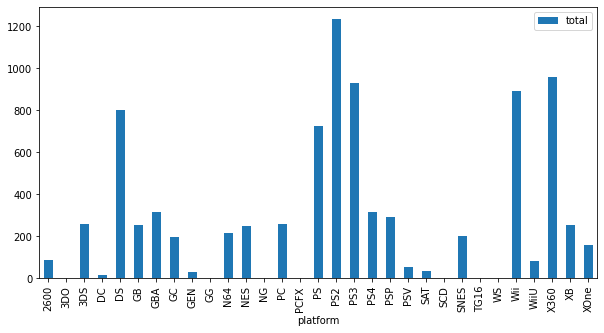

In [19]:
# сompare sales volume by platform
significant_data_platform = games_data.pivot_table(index='platform', values='total', aggfunc='sum')
significant_data_platform.plot( kind = 'bar', figsize = (10,5) )

plt.show()

### 3.4 Platforms with sales over the past few years. 

In [20]:
# calculate the best-selling platforms
filtered_platform_data = games_data.query('platform in ("PS2","X360","Wii","DS","PS3","PS")')

# pivot table the best-selling platforms
filtered_platform = filtered_platform_data.pivot_table(index='year_of_release', columns = 'platform', values='total', aggfunc='count')
print(filtered_platform)

platform            DS     PS    PS2    PS3    Wii   X360
year_of_release                                          
1985               1.0    NaN    NaN    NaN    NaN    NaN
1994               NaN   17.0    NaN    NaN    NaN    NaN
1995               NaN   99.0    NaN    NaN    NaN    NaN
1996               NaN  164.0    NaN    NaN    NaN    NaN
1997               NaN  188.0    NaN    NaN    NaN    NaN
1998               NaN  248.0    NaN    NaN    NaN    NaN
1999               NaN  200.0    NaN    NaN    NaN    NaN
2000               NaN  160.0   82.0    NaN    NaN    NaN
2001               NaN   91.0  185.0    NaN    NaN    NaN
2002               NaN   20.0  280.0    NaN    NaN    NaN
2003               NaN    3.0  256.0    NaN    NaN    NaN
2004              23.0    NaN  259.0    NaN    NaN    NaN
2005             118.0    NaN  260.0    NaN    NaN   18.0
2006             201.0    NaN  259.0   27.0   44.0   93.0
2007             376.0    NaN  214.0   90.0  185.0  123.0
2008          

### 3.5 How long does it generally take for new platforms to appear and old ones to fade?

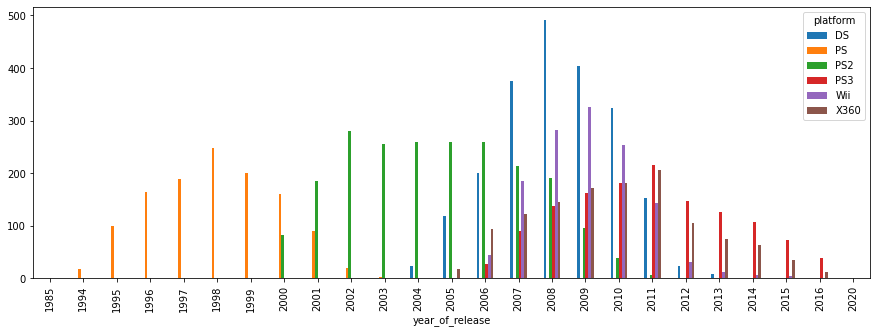

In [21]:
# graph of the platform lifetime
filtered_platform.plot( kind = 'bar', figsize = (15,5) )
plt.show()

In [22]:
# average of the platform lifetime
print('How long has the popular platform been on the market on average: ', filtered_platform_data.groupby('platform')['year_of_release'].nunique().mean())
print('How long has the platform been on the market on average: ', games_data.groupby('platform')['year_of_release'].nunique().mean())

How long has the popular platform been on the market on average:  11.333333333333334
How long has the platform been on the market on average:  7.774193548387097


### 3.6 Relevant Data

In [23]:
# selection of up-to-date data
relevant_data = games_data.query('year_of_release >= 2007')
relevant_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.81


### 3.7 Leading Sales Platforms

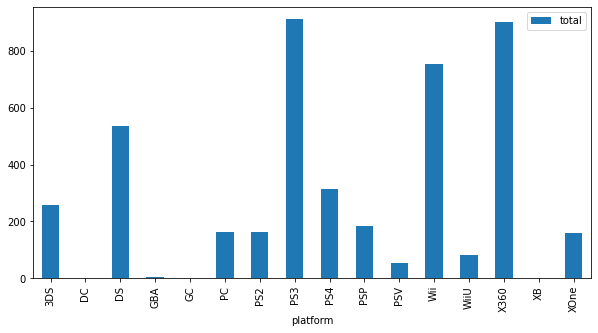

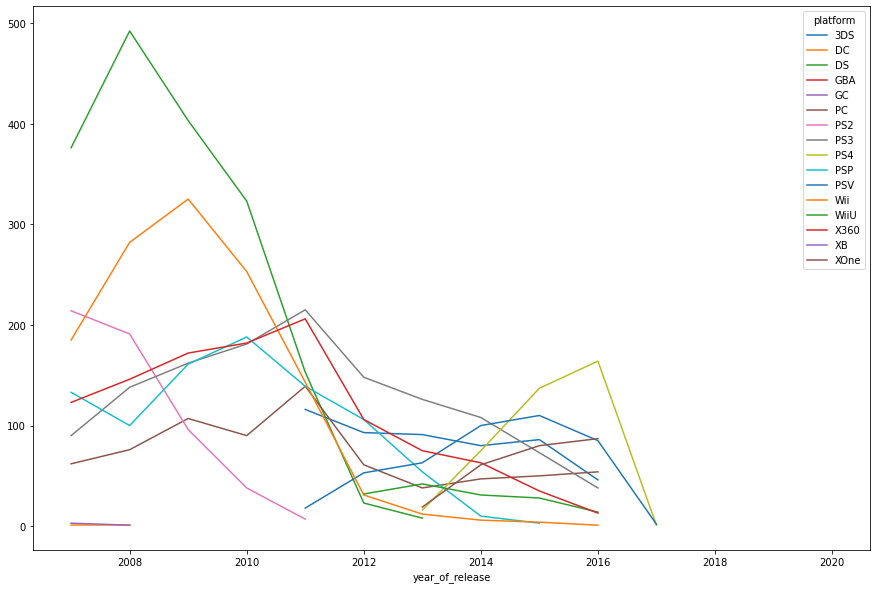

In [24]:
# total sales by platform 
relevant_data.pivot_table(index='platform', values='total', aggfunc='sum',).plot( kind = 'bar', figsize = (10,5))
plt.show()

# number of sales by platform
relevant_data.pivot_table(index='year_of_release', columns = 'platform', values='total', aggfunc='count').plot.line( figsize = (15,10))
plt.show()

### 3.8 Analysis of Popular Platforms

In [25]:
# the most popular platforms
relevant_data = games_data.query('year_of_release >= 2013')

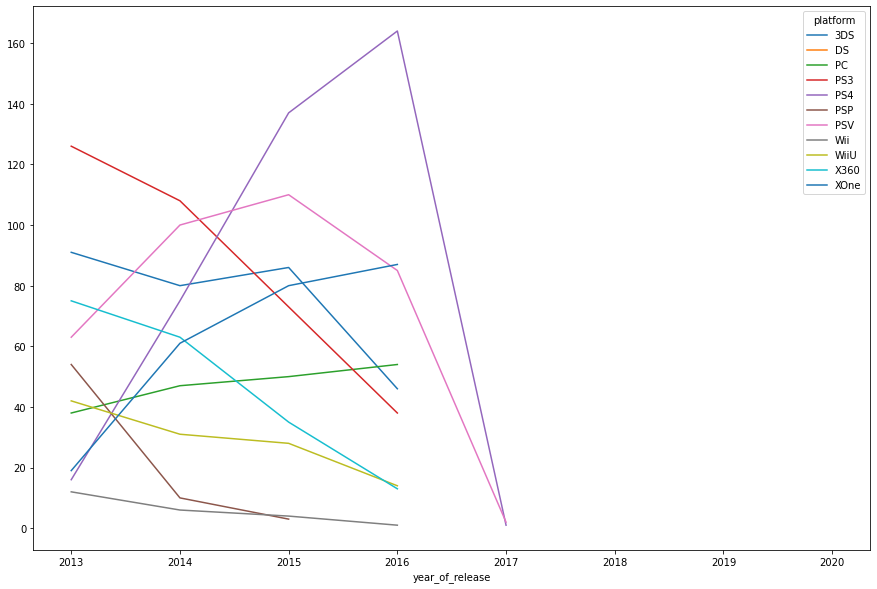

In [26]:
# growth and fall in popularity
relevant_data.pivot_table(index='year_of_release', columns = 'platform', values='total', aggfunc='count').plot.line( figsize = (15,10))
plt.show()

In [27]:
# basic statistics of popular platforms
profitable_data = relevant_data.query('platform in ("PC","XOne","PS4")')
profitable_data.describe()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,2014.973462,0.256900,0.263016,0.019710,0.079107,71.377563,6.695416,0.619047
std,0.972705,0.544337,0.607879,0.051585,0.188407,13.184533,1.541269,1.274319
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.300000,0.010000
25%,2014.000000,0.000000,0.020000,0.000000,0.000000,64.000000,6.000000,0.050000
50%,2015.000000,0.050000,0.070000,0.000000,0.020000,73.000000,7.000000,0.160000
75%,2016.000000,0.240000,0.240000,0.010000,0.060000,81.000000,7.800000,0.600000
max,2017.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.300000,14.630000


### 3.9 Sales by Platforms.

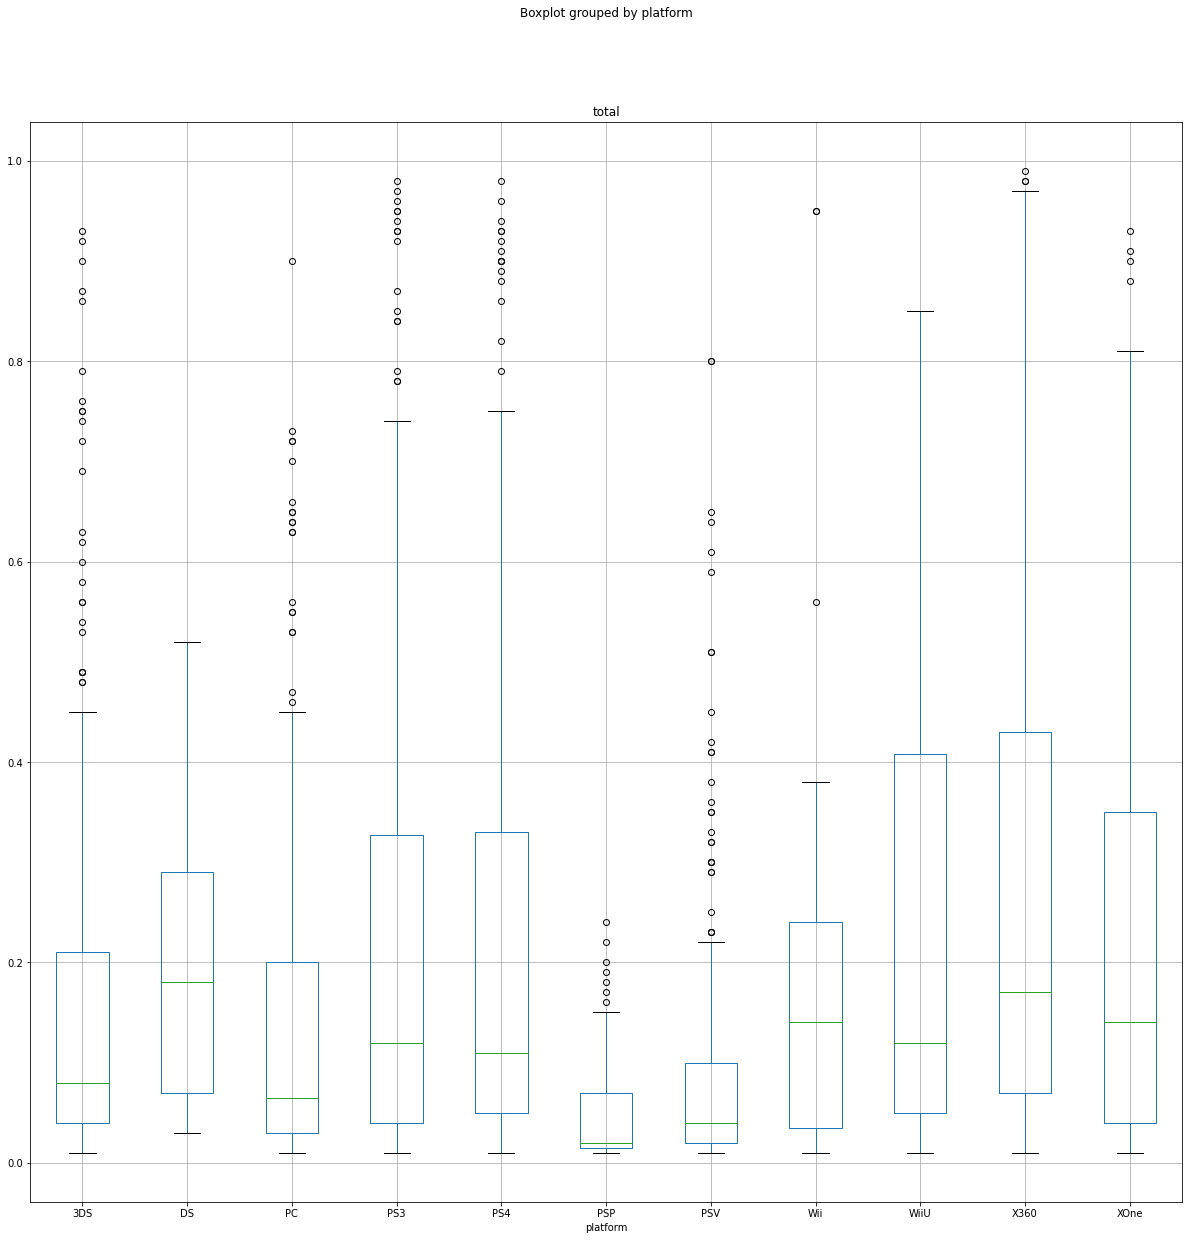

In [28]:
warnings.filterwarnings("ignore")

# sales across all platforms
games_data_sales = relevant_data.query('total<1')

# Plot a boxplot to visualize sales
games_data_sales.boxplot(column = 'total', by = 'platform',figsize=(20,20))
plt.show()

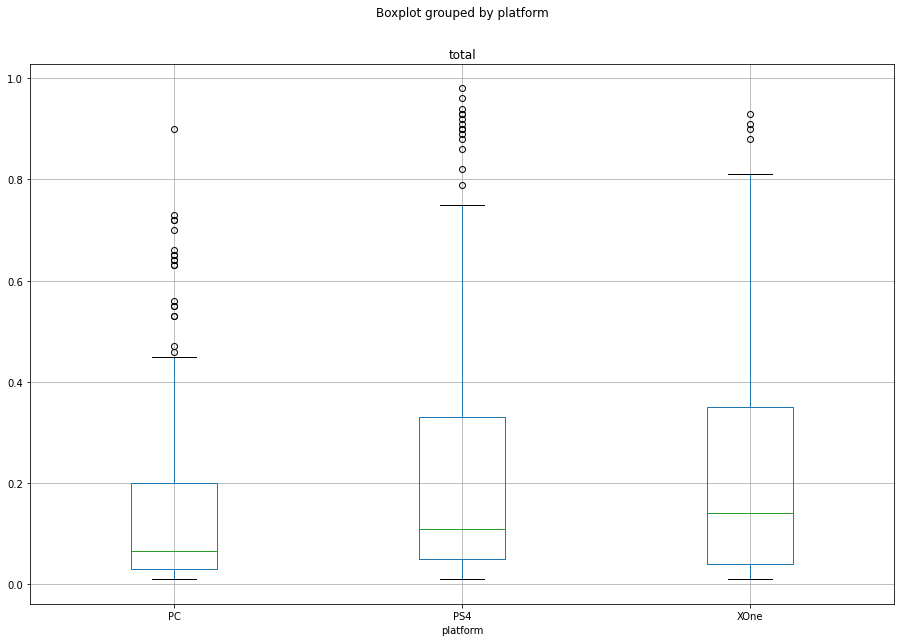

In [29]:
warnings.filterwarnings("ignore")

# Plot a boxplot to visualize the profitable platforms
profitable_data_plot = profitable_data.query('total<1')
profitable_data_plot.boxplot(column = 'total', by = 'platform',figsize=(15,10))
plt.show()

### 3.10 The Effects of Reviews on Sales According by Relevant Data

    critic_score  user_score  total
31          88.0         3.4  14.63
42          97.0         8.3  12.61
77          82.0         4.3   8.57
87          86.0         7.6   7.98
92          83.0         5.7   7.66


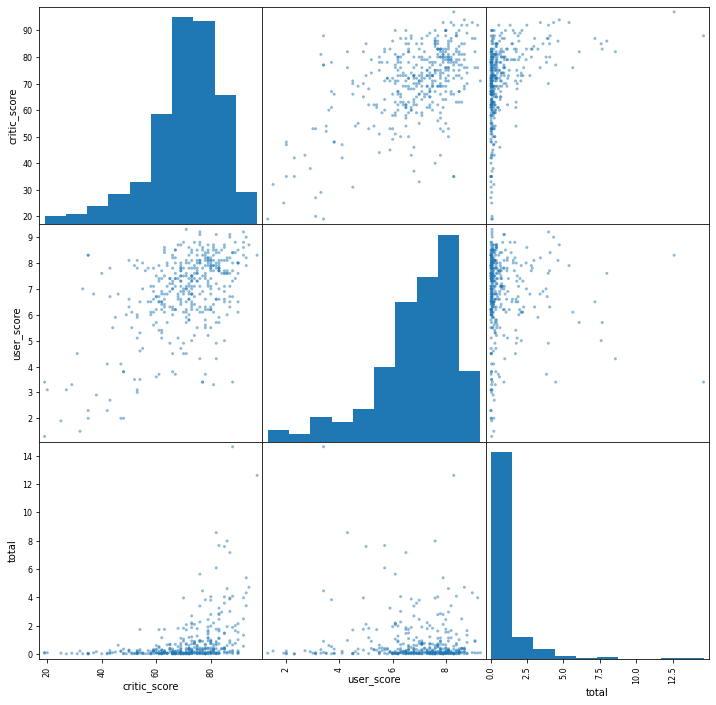

In [30]:
relevant_data_ps4 = games_data.query('platform == "PS4"')

# review score by relevant data
relevant_score_ps4 = relevant_data_ps4[['critic_score','user_score', 'total']]
print(relevant_score_ps4.head())

# scatter plot for each pair of features
pd.plotting.scatter_matrix(relevant_score_ps4, figsize=(12,12))
plt.show()

In [31]:
# correlation between sales and reviews
corr = relevant_score_ps4.corr()
corr

,critic_score,user_score,total
critic_score,1.000000,0.537437,0.368986
user_score,0.537437,1.000000,-0.053991
total,0.368986,-0.053991,1.000000


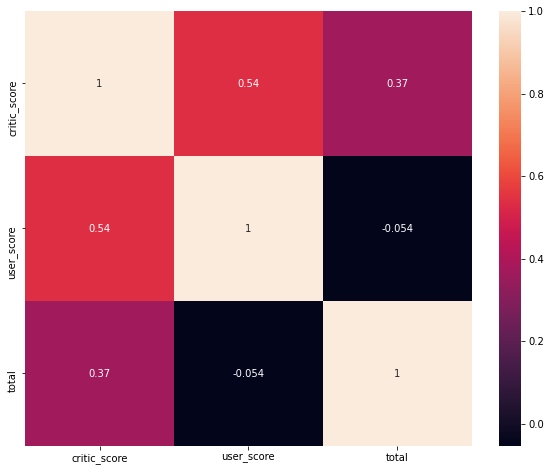

In [32]:
# visualization of the correlation between sales and reviews
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True)
plt.show()

### 3.11 The Effects of Reviews on Sales Across All Data

   critic_score  user_score  total
0          76.0         8.0  82.53
1          76.0         8.0  40.24
2          82.0         8.3  35.52
3          80.0         8.0  32.77
4          80.0         8.0  31.37


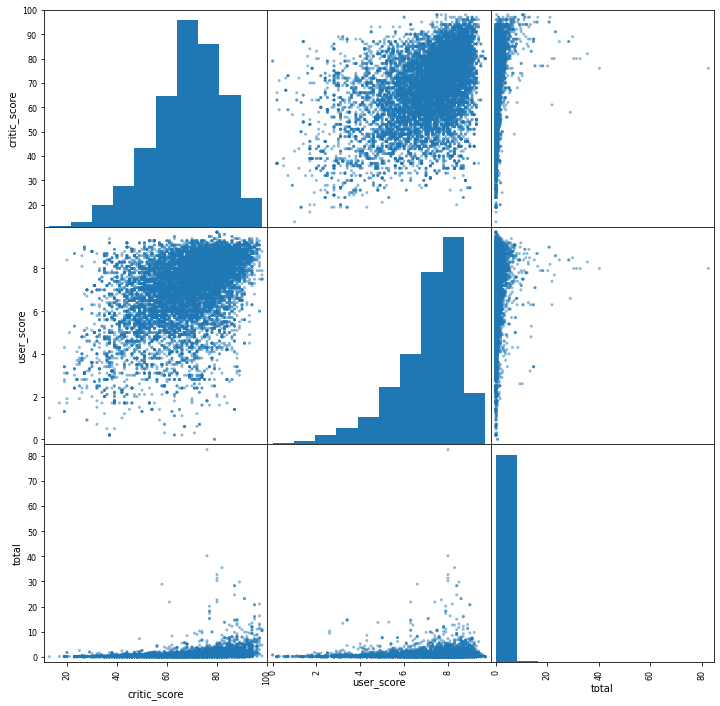

In [33]:
# review score by all of the data
score_other = games_data[['critic_score','user_score', 'total']]
print(score_other.head())

# scatter plot for each pair of features
pd.plotting.scatter_matrix(score_other, figsize=(12,12))
plt.show()

In [34]:
# correlation between sales and reviews
corr_other = score_other.corr()
corr_other

,critic_score,user_score,total
critic_score,1.000000,0.447854,0.232959
user_score,0.447854,1.000000,0.086997
total,0.232959,0.086997,1.000000


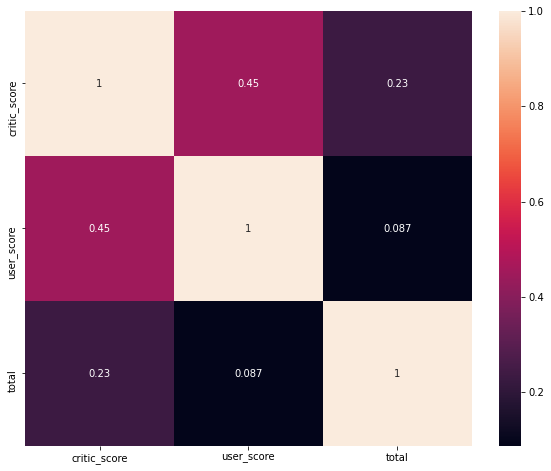

In [35]:
# visualization of the correlation between sales and reviews
plt.figure(figsize=(10,8))
sns.heatmap(corr_other, annot = True)
plt.show()

### 3.12 Distribution of Games by Genre

           genre      sum  median  count
0         Action  1717.63   0.190   3308
1      Adventure   233.46   0.050   1293
2       Fighting   442.63   0.210    837
3           Misc   790.94   0.160   1721
4       Platform   825.86   0.275    878
5         Puzzle   240.33   0.100    569
6         Racing   723.70   0.190   1226
7   Role-Playing   930.90   0.190   1483
8        Shooter  1041.83   0.235   1296
9     Simulation   388.40   0.155    858
10        Sports  1310.39   0.220   2306
11      Strategy   172.85   0.090    673

        genre     sum  median  count
1   Adventure  233.46    0.05   1293
5      Puzzle  240.33    0.10    569
11   Strategy  172.85    0.09    673

      genre      sum  median  count
0    Action  1717.63   0.190   3308
8   Shooter  1041.83   0.235   1296
10   Sports  1310.39   0.220   2306


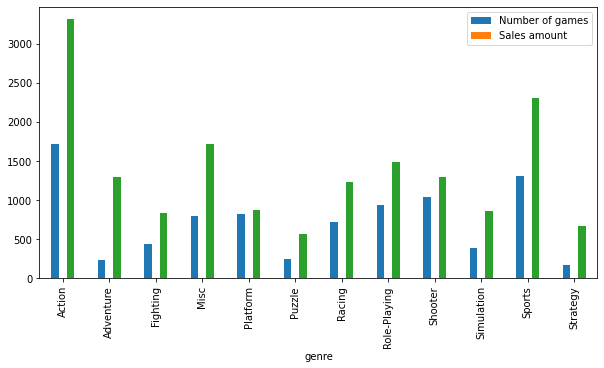

In [36]:
# number of games by genre
distribution_genre = games_data.groupby('genre')['total'].agg({'count','sum','median'}).reset_index()

print(distribution_genre)
print()

# genres with high sales
distribution_genre_low = distribution_genre.loc[distribution_genre['sum']<300]
print(distribution_genre_low)
print()

# genres with low sales
distribution_genre_high=distribution_genre.loc[distribution_genre['sum']>1000]
print(distribution_genre_high)

# visualization
distribution_genre.plot(x = 'genre', kind = 'bar', figsize = (10,5))
plt.legend(["Number of games", "Sales amount"])
plt.show()


### 3.13 Conclusion

The analysis showed that the growth of video game sales began in the early 2000s. The best-selling games were on the PS2, PS3, X360, Wii, DS platforms. The average lifetime for platforms is about 7.5 years, for more popular platforms about 11 years. The best-selling games over the past 10 years have been games in the Action, Sports and Shooter genres. Less well-selling genres are Strategy, Adventure and Puzzle. Calculations have shown that sales are more influenced by the evaluation of critics than the evaluation of users. There is a slight linear relationship between critics' and users' ratings. If we take the data for 2016, then there were more sales on the PS4 platform in the Shooter and Sport genres in North America region.

## Stage 4
1. Top five platforms for each region (NA, EU, JP) 
2. Top five genres for each region (NA, EU, JP)
3. The impact of ESRB ratings on sales in certain regions
4. Conclusion

### 4.1 Data Slices by Region

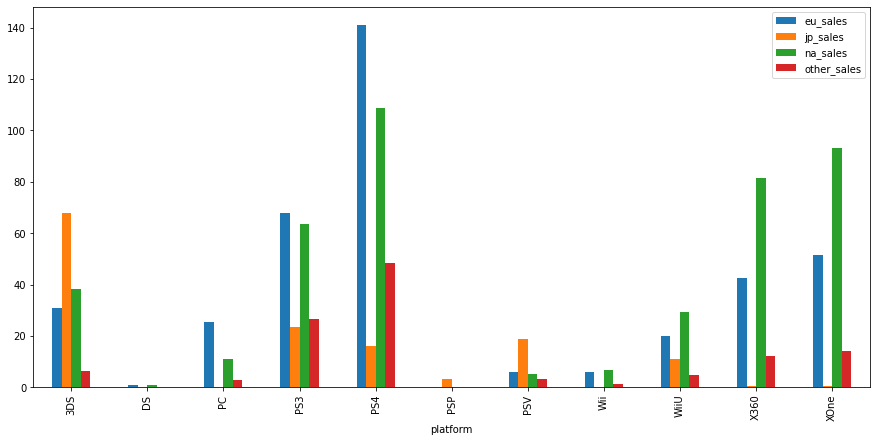

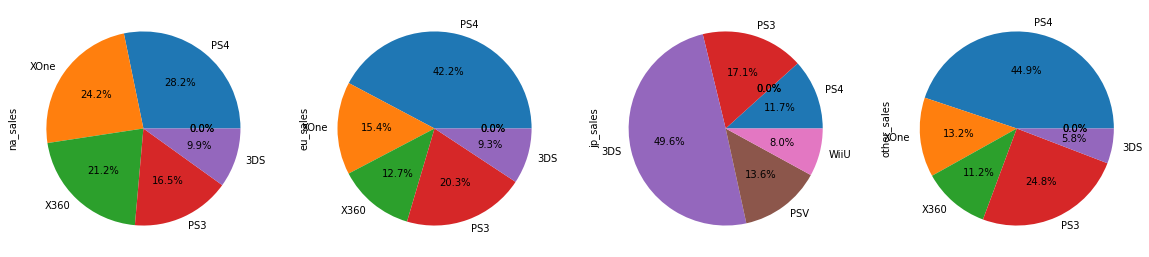

In [37]:
warnings.filterwarnings("ignore")

# sum and number of sales by region
top_platforms_na = relevant_data.groupby('platform').agg({'name': 'count', 'na_sales': 'sum'}).sort_values(by = 'na_sales',ascending = False).head()
top_platforms_eu = relevant_data.groupby('platform').agg({'name': 'count', 'eu_sales': 'sum'}).sort_values(by = 'eu_sales',ascending = False).head()
top_platforms_jp = relevant_data.groupby('platform').agg({'name': 'count', 'jp_sales': 'sum'}).sort_values(by = 'jp_sales',ascending = False).head()
top_platforms_other = relevant_data.groupby('platform').agg({'name': 'count', 'other_sales': 'sum'}).sort_values(by = 'other_sales',ascending = False).head()

# creating a new dataframe
regions_platform = top_platforms_na.merge(top_platforms_eu, on = 'platform',how='outer')
regions_platform = regions_platform.merge(top_platforms_jp, on = 'platform',how='outer')
regions_platform = regions_platform.merge(top_platforms_other, on = 'platform',how='outer')
regions_platform = regions_platform.drop(['name_x','name_y'], axis=1)
regions_platform = regions_platform.fillna(0)

# Plot a boxplot to visualize the distribution by regions
regions = relevant_data[['na_sales','eu_sales','jp_sales','other_sales']]

# the amount of sales by region
data_regions = relevant_data.pivot_table(index = 'platform', values = regions, aggfunc = 'sum')

# visualization
data_regions.plot( kind = 'bar', figsize = (15,7))
regions_platform.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(20, 20),legend=False)
plt.show()



### 4.2 Data Slices by Genre

              na_sales  eu_sales  jp_sales  other_sales
genre                                                  
Action          126.05    118.13     40.50        37.20
Shooter         109.74     87.86      6.61        28.77
Sports           65.27     60.52      5.41        19.45
Role-Playing     46.40     36.97     51.09        11.48
Misc             27.49     20.04      9.20         6.09
Platform         18.14     15.58      4.79         4.12
Fighting         15.55      8.55      7.65         3.56
Racing           12.96     20.19      2.30         4.44
Adventure         7.14      8.25      5.82         2.43
Simulation        5.13     10.92      4.52         1.48
Strategy          3.28      4.22      1.77         0.81
Puzzle            0.83      1.00      1.18         0.16


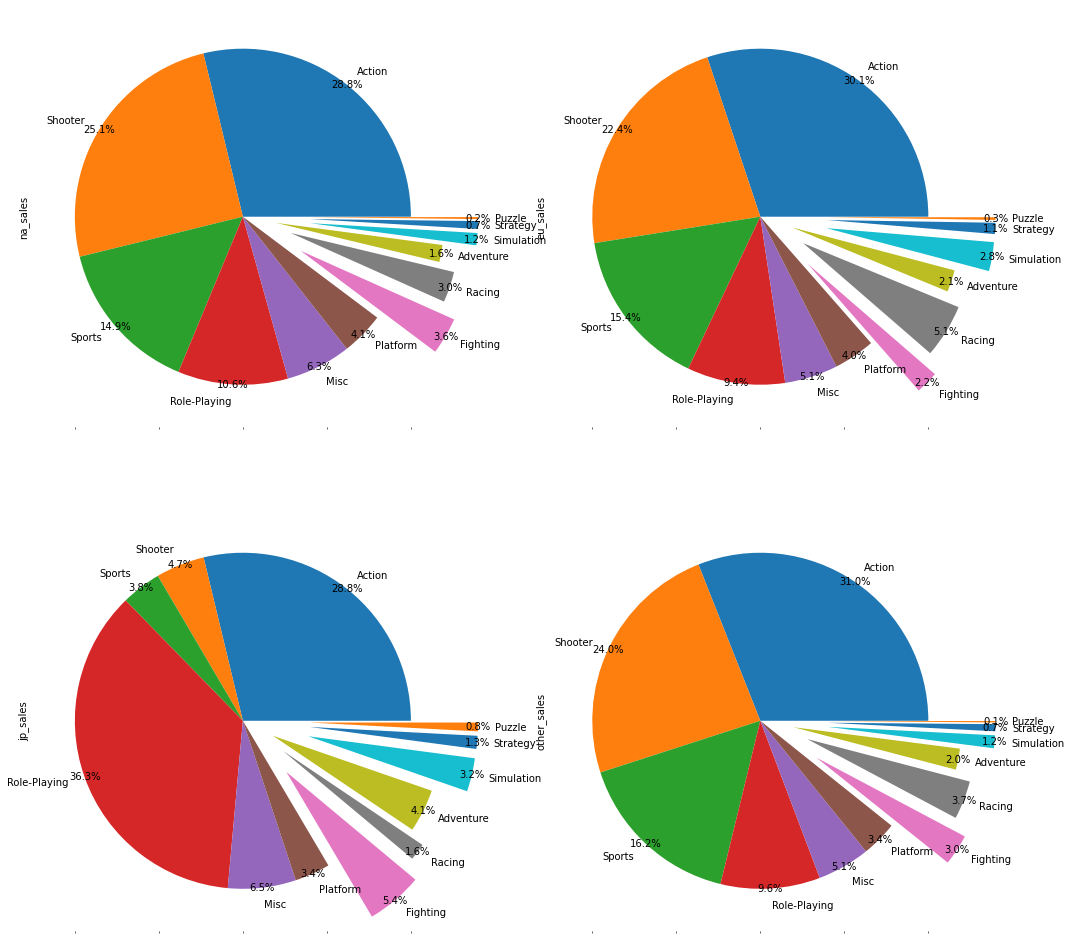

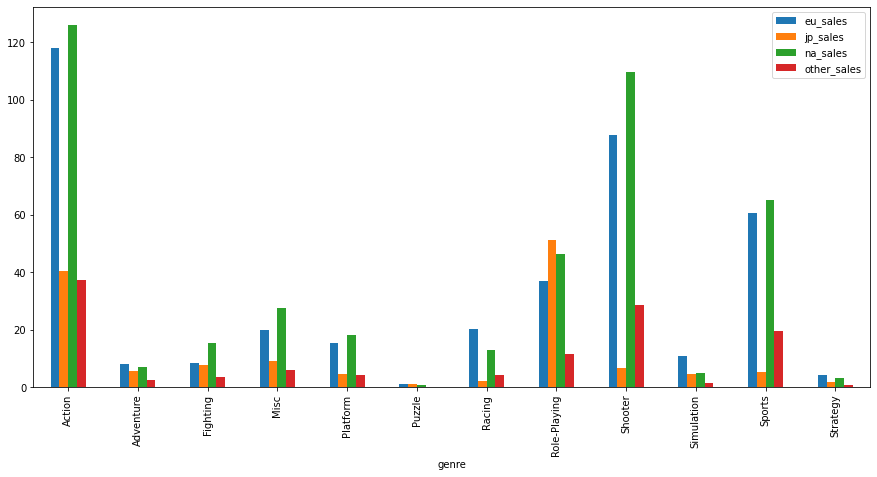

In [38]:
# the amount of sales by genre
data_genre = relevant_data.pivot_table(index = 'genre', values = regions, aggfunc = 'sum')
top_genre = relevant_data.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']].sum().sort_values(by = ['na_sales','eu_sales','jp_sales','other_sales'],ascending = False)
print(top_genre)

# visualization
explode = (0,0,0,0,0,0,.4,.3,.2,.4,.4,.4)

plot = top_genre.plot.pie(subplots=True,autopct='%1.1f%%',explode=explode,layout=(2,2),pctdistance = 1, figsize=(17, 17),legend=False)
data_genre.plot( kind = 'bar', figsize = (15,7))
plt.show()

### 4.3 Data Slices by Rating

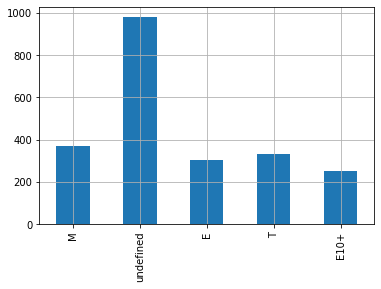

In [39]:
#https://www.esrb.org/ratings-guide/

# rating of the most popular games
rating = list(relevant_data['rating'])
letter_counts = Counter(rating)
data_rating = pd.DataFrame.from_dict(letter_counts, orient='index')

# visualization
data_rating.plot(kind='bar',grid = True,legend=False)
plt.show()

             na_sales  eu_sales  jp_sales  other_sales
na_sales     1.000000  0.769988  0.264551     0.817372
eu_sales     0.769988  1.000000  0.244706     0.934804
jp_sales     0.264551  0.244706  1.000000     0.195273
other_sales  0.817372  0.934804  0.195273     1.000000


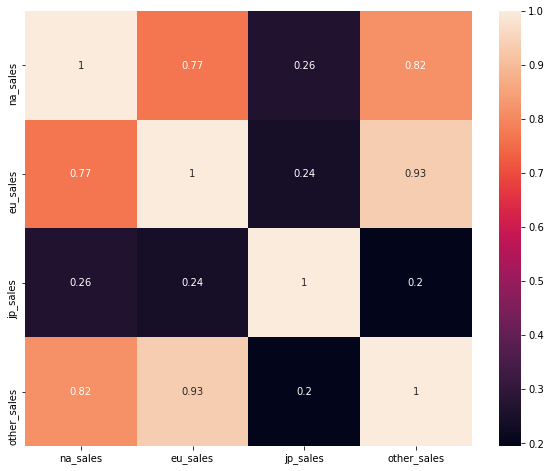

In [40]:
# number of sales of ESRB rating games by region
regions_rating = relevant_data[['na_sales','eu_sales','jp_sales','other_sales','rating']]

# correlation between sales and ratings
corr_rating = regions_rating.corr()
print(corr_rating)

# visualization
plt.figure(figsize=(10,8))
sns.heatmap(corr_rating, annot = True)
plt.show()

### 4.4 Conclusion

An analysis of individual regions showed that the highest sales are in North America, almost 2 times higher than in all other regions. Japan is very different by all criteria, other platforms, video game genres are popular there, as well as the ESRB rating. That is, there is a very good correlation between North America, Europe and other regions. Japan is out of this statistic.

## Stage 5
Test the following hypotheses:
1. The average ratings of users of the Xbox One and PC platforms are the same.
2. Conclusion
3. Average ratings of users of the genres "Action" and "Sport" differ.
4. Conclusion

### 5.1 Average user ratings of the Xbox One and PC platforms.

Average user ratings of the Xbox One and PC platforms are the same.

H0: The mean of user score of the Xbox One and PC platforms are equal.

H1: The mean of user score of the Xbox One and PC platforms differ.

In [41]:
# calculate the mean revenue for both plans and print it.
user_score_xone = relevant_data[relevant_data['platform']=='XOne'].groupby(['name'])['user_score'].mean()
user_score_pc = relevant_data[relevant_data['platform']=='PC'].groupby(['name'])['user_score'].mean()

print(user_score_xone.mean())
print(user_score_pc.mean())

6.620242914979757
6.421693121693118


In [42]:
# calculate the standard deviation of both plans and print it.
user_score_xone_var = relevant_data[relevant_data['platform']=='XOne']['user_score'].var()
user_score_pc_var = relevant_data[relevant_data['platform']=='PC']['user_score'].var()

print('Standard deviation according to the platform "XOne": ', user_score_xone_var)
print('Standard deviation according to the platform "PC": ', user_score_pc_var)

Standard deviation according to the platform "XOne":  2.0121088838418735
Standard deviation according to the platform "PC":  2.8603247776652037


In [43]:
# calculate the standard deviation of both plans and print it.
user_score_xone_std = relevant_data[relevant_data['platform']=='XOne']['user_score'].std()
user_score_pc_std = relevant_data[relevant_data['platform']=='PC']['user_score'].std()

print('Standard deviation according to the platform "XOne": ', user_score_xone_std)
print('Standard deviation according to the platform "PC": ', user_score_pc_std)

Standard deviation according to the platform "XOne":  1.4184882388803488
Standard deviation according to the platform "PC":  1.6912494723325722


In [44]:
# Test the hypotheses H0
sample_xone = games_data[(games_data['platform']=='XOne')&(games_data['year_of_release']==2016)]['user_score']
sample_pc = games_data[(games_data['platform']=='PC')&(games_data['year_of_release']==2016)]['user_score']

alpha = 0.05

results_platform = st.ttest_ind(sample_xone, sample_pc)
print('p-value : ', results_platform.pvalue)

if results_platform.pvalue < alpha:
    print('We reject the null hypothesis.')
else: 
    print("We can't reject the null hypothesis.")

p-value :  0.5722268719384083
We can't reject the null hypothesis.


### 5.2 Conclusion

The average value and variance of the two samples for 2016 of Xbox One and PC users are close in value. Therefore, a significance level of 5% was chosen to check the probability of matching user ratings of these two platforms. The resulting p value of 57% tells us that we can definitely accept our hypothesis about the equality of user ratings.

### 5.3 Average user ratings for the Action and Sports genres.

Average ratings of users of the genres "Action" and "Sport" differ.

H0: The mean value user's score of the genres "Action" and "Sport" differ.

H1: The mean value user's score of the genres "Action" and "Sport" are equal.

In [45]:
# calculate the mean revenue for both plans.
user_score_action = games_data[games_data['genre']=='Action'].groupby(['name'])['user_score'].mean()
user_score_sports = games_data[games_data['genre']=='Sports'].groupby(['name'])['user_score'].mean()

print(user_score_action.mean())
print(user_score_sports.mean())

7.113766371870345
7.048019998140787


In [46]:
# calculate the standard deviation of both plans
user_score_action_var = games_data[games_data['genre']=='Action']['user_score'].var()
user_score_sports_var = games_data[games_data['genre']=='Sports']['user_score'].var()

print('Standard deviation according to the platform "XOne": ', user_score_action_var)
print('Standard deviation according to the platform "PC": ', user_score_sports_var)

Standard deviation according to the platform "XOne":  2.091518656698709
Standard deviation according to the platform "PC":  2.459269403781141


In [47]:
# calculate the standard deviation of both plans
user_score_action_std = games_data[games_data['genre']=='Action']['user_score'].std()
user_score_sports_std = games_data[games_data['genre']=='Sports']['user_score'].std()

print('Standard deviation according to the platform "XOne": ', user_score_action_std)
print('Standard deviation according to the platform "PC": ', user_score_sports_std)

Standard deviation according to the platform "XOne":  1.4462083725033226
Standard deviation according to the platform "PC":  1.56820579127267


In [48]:
# Test the hypotheses H0
sample_action = games_data[(games_data['genre']=='Action')&(games_data['year_of_release']==2016)]['user_score']
sample_sports = games_data[(games_data['genre']=='Sports')&(games_data['year_of_release']==2016)]['user_score']

alpha = 0.01

results_genre = st.ttest_ind(sample_action,sample_sports)
print('p-value : ', results_genre.pvalue)

if results_genre.pvalue < alpha:
    print('We reject the null hypothesis.')
else: 
    print("We can't reject the null hypothesis.")

p-value :  0.0037174533369185086
We reject the null hypothesis.


### 5.4 Conclusion

The mean value and variance of the two samples for 2016 of users choosing video games in the genres of "Sport" and "Action" are close in value. We tested the hypothesis H0 that the user score of these genres are different, so the significance level of 1% was chosen. The resulting value of p equal to 0.3% tells us that we can reject the H0 hypothesis about the difference in user's score and say that users rate these genres the same.

## Stage 6
### General Conclusion

In order to make a forecast for the next year, it should be taken into account that
- the gaming platform should be on the market for no more than 7 years, if it is not a PC
- the video game market is very different for Japan, compared to other regions. 
- Japan also differs from other regions in popular game genres and ESRB rating
- the evaluation of critics and users greatly affects sales worldwide, except for the Japanese region. 
I would advise
1. Platforms 
    - for all regions: PC, PS4, XBox One
    - for North America, Europe and other: X360, PS3, Wii
    - for Japan: 3DS, DS,PS3
2. Genre
    - for all regions: Action, Shooter, Sports
    - for North America, Europe and other: Misc, Racing
    - for Japan: Role-Playing, Adventure
3. Score
    - for North America, Europe
4. ESRB rating
    - for all regions: E, E+10, T
    - for Japan: M